In [1]:
include("src/MTH8404_projet.jl")
using .problems, 
    .all_at_once,
    .LQT,
    .model

# Comparaison de la trajectoire A sans perturbation 

In [2]:
traj_target = generate_problem("A")
stats_ipopt = all_at_once_ipopt(traj_target)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    35944
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    10989

Total number of variables............................:    15984
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equal

"Execution stats: first-order stationary"

In [3]:
stats_ripqp = all_at_once_RipQP(traj_target)

┌ Info:   iter       obj      rgap      ‖rb‖      ‖rc‖      ‖Δx‖     α_pri      α_du         μ  
└ @ RipQP /home/abraham/.julia/packages/RipQP/gMieu/src/RipQP.jl:72
┌ Info:      0   1.8e+04   5.6e+00   3.7e-01   4.7e+02   0.0e+00   0.0e+00   0.0e+00       NaN
└ @ RipQP /home/abraham/.julia/packages/RipQP/gMieu/src/RipQP.jl:77
┌ Info:      1  -3.4e+07   4.1e-03   8.0e-01   7.0e-01   8.3e+03   1.0e+00   1.0e+00       NaN
└ @ RipQP /home/abraham/.julia/packages/RipQP/gMieu/src/iterations/iterations.jl:168
┌ Info:      2  -3.4e+07   1.5e-04   7.7e-02   1.3e-03   9.9e+01   1.0e+00   1.0e+00       NaN
└ @ RipQP /home/abraham/.julia/packages/RipQP/gMieu/src/iterations/iterations.jl:168
┌ Info:      3  -3.4e+07   5.3e-06   6.2e-03   5.2e-05   2.5e+01   1.0e+00   1.0e+00       NaN
└ @ RipQP /home/abraham/.julia/packages/RipQP/gMieu/src/iterations/iterations.jl:168
┌ Info:      4  -3.4e+07   6.1e-08   9.5e-05   8.1e-07   3.1e+00   1.0e+00   1.0e+00       NaN
└ @ RipQP /home/abraham/.julia/packag

"Execution stats: solved to within acceptable tolerances"

In [4]:
stats_lqt = LQT_D(traj_target)

"Execution stats: first-order stationary"

In [5]:
using Plots
pyplot()
using .post_processing

output = "rapport3"

traj_opt_ipopt, traj_sim_ipopt = sol_2_trajectory(stats_ipopt, traj_target)
traj_opt_ripqp, traj_sim_ripqp = sol_2_trajectory(stats_ripqp, traj_target)
traj_opt_lqt, traj_sim_lqt = sol_2_trajectory(stats_lqt, traj_target)

dt= 0.060060
n=  1000
     i          ϕ         dϕ          θ         dθ          ψ         dψ          x         dx          y         dy          z         dz
     1    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000
     2    0.000000  -0.000000   0.000000   2.650141   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000  -0.000000
     3   -0.000000  -0.000000   0.159168   1.758903   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000  -0.000000  -0.000000
     4   -0.000000  -0.000000   0.264807   1.016192   0.000000   0.000000   0.000000   0.093780   0.000000   0.000000  -0.000000  -0.000000
     5   -0.000000  -0.000000   0.325840   0.426574   0.000000   0.000000   0.005632   0.248640   0.000000   0.000000  -0.000000  -0.000000
     6   -0.000000  -0.000000   0.351460  -0.025656   0.000000   0.000000   0.020566   0.437543   0.000000   0.000000  -0.000000   0.000000

    76    0.000000   0.000000   0.021193  -0.000238   0.000000   0.000000   4.499997   0.998507   0.000000   0.000000  -0.000000  -0.000000
    77    0.000000   0.000000   0.021179  -0.000310   0.000000   0.000000   4.559967   0.998629   0.000000   0.000000  -0.000000  -0.000000
    78    0.000000   0.000000   0.021160  -0.000356   0.000000   0.000000   4.619945   0.998741   0.000000  -0.000000  -0.000000  -0.000000
    79    0.000000   0.000000   0.021139  -0.000378   0.000000   0.000000   4.679929   0.998840   0.000000  -0.000000  -0.000000  -0.000000
    80    0.000000   0.000000   0.021116  -0.000381   0.000000   0.000000   4.739920   0.998926   0.000000  -0.000000  -0.000000   0.000000
    81    0.000000   0.000000   0.021093  -0.000368   0.000000   0.000000   4.799915   0.998997   0.000000  -0.000000  -0.000000   0.000000
    82    0.000000   0.000000   0.021071  -0.000343   0.000000   0.000000   4.859915   0.999054   0.000000  -0.000000  -0.000000   0.000000
    83    0.000000  

   150   -0.000000  -0.000000   0.020997  -0.000000   0.000000   0.000000   8.940000   0.999000  -0.000000  -0.000000  -0.000000  -0.000000
   151   -0.000000  -0.000000   0.020997  -0.000000   0.000000   0.000000   9.000000   0.999000  -0.000000  -0.000000  -0.000000  -0.000000
   152   -0.000000  -0.000000   0.020997  -0.000000   0.000000   0.000000   9.060000   0.999000  -0.000000  -0.000000  -0.000000  -0.000000
   153   -0.000000  -0.000000   0.020997  -0.000000   0.000000   0.000000   9.120000   0.999000  -0.000000  -0.000000  -0.000000  -0.000000
   154   -0.000000  -0.000000   0.020997  -0.000000   0.000000   0.000000   9.180000   0.999000  -0.000000  -0.000000  -0.000000   0.000000
   155   -0.000000  -0.000000   0.020997  -0.000000   0.000000   0.000000   9.240000   0.999000  -0.000000  -0.000000  -0.000000   0.000000
   156   -0.000000  -0.000000   0.020997  -0.000000   0.000000   0.000000   9.300000   0.999000  -0.000000  -0.000000  -0.000000   0.000000
   157   -0.000000  

   224   -0.000000   0.000000   0.020997  -0.000000   0.000000   0.000000  13.380000   0.999000   0.000000   0.000000  -0.000004  -0.000046
   225   -0.000000   0.000000   0.020997  -0.000000   0.000000   0.000000  13.440000   0.999000   0.000000   0.000000  -0.000007  -0.000052
   226   -0.000000   0.000000   0.020997  -0.000000   0.000000   0.000000  13.500000   0.999000   0.000000   0.000000  -0.000010  -0.000047
   227   -0.000000   0.000000   0.020997  -0.000000   0.000000   0.000000  13.560000   0.999000   0.000000   0.000000  -0.000013  -0.000022
   228   -0.000000   0.000000   0.020997  -0.000000   0.000000   0.000000  13.620000   0.999000   0.000000   0.000000  -0.000014   0.000036
   229    0.000000   0.000000   0.020997  -0.000000   0.000000   0.000000  13.680000   0.999000   0.000000   0.000000  -0.000012   0.000140
   230    0.000000   0.000000   0.020997  -0.000000   0.000000   0.000000  13.740000   0.999000   0.000000   0.000000  -0.000004   0.000302
   231    0.000000  

   298    0.000000   0.000000   0.020997   0.000000   0.000000   0.000000  17.820000   0.999000   0.000000  -0.000001   2.820000   0.999000
   299    0.000000   0.000000   0.020997   0.000000   0.000000   0.000000  17.880000   0.999000   0.000000  -0.000001   2.880000   0.999000
   300    0.000000   0.000000   0.020997   0.000000   0.000000   0.000000  17.940000   0.999000  -0.000000  -0.000001   2.940000   0.999000
   301    0.000000  -0.000000   0.020997   0.000000   0.000000   0.000000  18.000000   0.999000  -0.000000  -0.000001   3.000000   0.999000
   302    0.000000  -0.000000   0.020997   0.000000   0.000000   0.000000  18.060000   0.999000  -0.000000  -0.000001   3.060000   0.999000
   303    0.000000  -0.000000   0.020997   0.000000   0.000000   0.000000  18.120000   0.999000  -0.000000  -0.000001   3.120000   0.999000
   304    0.000000  -0.000000   0.020997  -0.000000   0.000000   0.000000  18.180000   0.999000  -0.000000  -0.000001   3.180000   0.999000
   305    0.000000  

   372   -0.000049  -0.000106   0.020997   0.000000   0.000000   0.000000  22.260000   0.999000  -0.000066   0.000034   7.260000   0.999000
   373   -0.000055  -0.000104   0.020997   0.000000   0.000000   0.000000  22.320000   0.999000  -0.000064   0.000062   7.320000   0.999000
   374   -0.000061  -0.000100   0.020997  -0.000000   0.000000   0.000000  22.380000   0.999000  -0.000060   0.000094   7.380000   0.999000
   375   -0.000067  -0.000093   0.020997  -0.000000   0.000000   0.000000  22.440000   0.999000  -0.000054   0.000129   7.440000   0.999000
   376   -0.000073  -0.000082   0.020997  -0.000000   0.000000   0.000000  22.500000   0.999000  -0.000046   0.000167   7.500000   0.999000
   377   -0.000078  -0.000068   0.020997  -0.000000   0.000000   0.000000  22.560000   0.999001  -0.000036   0.000208   7.560000   0.999000
   378   -0.000082  -0.000050   0.020997  -0.000001   0.000000   0.000000  22.620000   0.999001  -0.000024   0.000251   7.620000   0.999000
   379   -0.000085  

   446    0.006784   0.039460   0.021349  -0.000720   0.000000   0.000000  26.700097   1.000331   0.026106   0.033167  11.700000   0.999000
   447    0.009154   0.042730   0.021305  -0.001163   0.000000   0.000000  26.760177   1.000522   0.028098   0.028759  11.760000   0.999000
   448    0.011721   0.045620   0.021235  -0.001660   0.000000   0.000000  26.820269   1.000685   0.029825   0.023010  11.820000   0.999000
   449    0.014461   0.048003   0.021136  -0.002201   0.000000   0.000000  26.880370   1.000804   0.031207   0.015819  11.880000   0.999000
   450    0.017344   0.049741   0.021004  -0.002770   0.000000   0.000000  26.940478   1.000864   0.032157   0.007103  11.940000   0.999000
   451    0.020331   0.050687   0.020837  -0.003346   0.000000   0.000000  27.000590   1.000845   0.032584  -0.003204  12.000000   0.999000
   452    0.023375   0.050685   0.020636  -0.003902   0.000000   0.000000  27.060701   1.000728   0.032391  -0.015143  12.060000   0.999000
   453    0.026419  

   520    0.205831  -0.379628  -0.005149   0.011691   0.000000   0.000000  28.862665  -1.068211   5.183842   0.368454  13.855330  -1.001957
   521    0.183030  -0.376065  -0.004447  -0.002567   0.000000   0.000000  28.798508  -1.058017   5.205972   0.242618  13.795152  -1.002406
   522    0.160444  -0.366829  -0.004601  -0.013668   0.000000   0.000000  28.734963  -1.047535   5.220543   0.131774  13.734947  -1.002731
   523    0.138412  -0.352801  -0.005422  -0.021841   0.000000   0.000000  28.672048  -1.037274   5.228458   0.035611  13.674723  -1.002940
   524    0.117223  -0.334836  -0.006734  -0.027379   0.000000   0.000000  28.609750  -1.027623   5.230596  -0.046381  13.614487  -1.003057
   525    0.097112  -0.313754  -0.008378  -0.030615   0.000000   0.000000  28.548031  -1.018865   5.227811  -0.114873  13.554243  -1.003107
   526    0.078268  -0.290323  -0.010217  -0.031904   0.000000   0.000000  28.486838  -1.011184   5.220912  -0.170668  13.493996  -1.003116
   527    0.060831  

   594   -0.000558   0.000243  -0.021076  -0.000010   0.000000   0.000000  24.397589  -1.003022   5.000121  -0.002451   9.397590  -1.003012
   595   -0.000543   0.000374  -0.021076  -0.000011   0.000000   0.000000  24.337348  -1.003019   4.999974  -0.002092   9.337349  -1.003012
   596   -0.000521   0.000480  -0.021077  -0.000011   0.000000   0.000000  24.277106  -1.003016   4.999848  -0.001745   9.277108  -1.003012
   597   -0.000492   0.000562  -0.021078  -0.000011   0.000000   0.000000  24.216865  -1.003014   4.999743  -0.001417   9.216867  -1.003012
   598   -0.000458   0.000622  -0.021078  -0.000011   0.000000   0.000000  24.156624  -1.003012   4.999658  -0.001109   9.156627  -1.003012
   599   -0.000421   0.000661  -0.021079  -0.000010   0.000000   0.000000  24.096383  -1.003010   4.999592  -0.000825   9.096386  -1.003012
   600   -0.000381   0.000683  -0.021080  -0.000009   0.000000   0.000000  24.036142  -1.003009   4.999542  -0.000567   9.036145  -1.003012
   601   -0.000340  

   668    0.000001   0.000002  -0.021081   0.000000   0.000000   0.000000  19.939759  -1.003012   4.999997   0.000009   4.939759  -1.003012
   669    0.000001   0.000002  -0.021081   0.000000   0.000000   0.000000  19.879518  -1.003012   4.999998   0.000009   4.879518  -1.003012
   670    0.000001   0.000001  -0.021081   0.000000   0.000000   0.000000  19.819277  -1.003012   4.999998   0.000008   4.819277  -1.003012
   671    0.000001   0.000001  -0.021081   0.000000   0.000000   0.000000  19.759036  -1.003012   4.999999   0.000007   4.759036  -1.003012
   672    0.000001   0.000000  -0.021081   0.000000   0.000000   0.000000  19.698795  -1.003012   4.999999   0.000007   4.698795  -1.003012
   673    0.000001  -0.000000  -0.021081   0.000000   0.000000   0.000000  19.638554  -1.003012   4.999999   0.000006   4.638554  -1.003012
   674    0.000001  -0.000001  -0.021081   0.000000   0.000000   0.000000  19.578313  -1.003012   5.000000   0.000005   4.578313  -1.003012
   675    0.000001  

   742    0.000000  -0.000000  -0.020805   0.000736   0.000000   0.000000  15.481858  -1.002684   5.000000  -0.000000   0.478385  -1.034122
   743    0.000000  -0.000000  -0.020761   0.000713   0.000000   0.000000  15.421637  -1.002525   5.000000  -0.000000   0.416276  -1.035203
   744    0.000000  -0.000000  -0.020718   0.000661   0.000000   0.000000  15.361425  -1.002342   5.000000  -0.000000   0.354102  -1.026583
   745   -0.000000  -0.000000  -0.020678   0.000580   0.000000   0.000000  15.301225  -1.002136   5.000000  -0.000000   0.292445  -1.001398
   746   -0.000000  -0.000000  -0.020643   0.000469   0.000000   0.000000  15.241036  -1.001910   5.000000  -0.000000   0.232301  -0.951436
   747   -0.000000  -0.000000  -0.020615   0.000333   0.000000   0.000000  15.180862  -1.001665   5.000000  -0.000000   0.175158  -0.868531
   748   -0.000000  -0.000000  -0.020595   0.000177   0.000000   0.000000  15.120702  -1.001407   5.000000  -0.000000   0.122993  -0.747353
   749   -0.000000  

   816   -0.000000   0.000000  -0.020997   0.000001   0.000000   0.000000  11.040000  -0.999000   5.000000  -0.000000  -0.000000   0.000000
   817   -0.000000   0.000000  -0.020997   0.000001   0.000000   0.000000  10.980000  -0.999001   5.000000   0.000000   0.000000   0.000000
   818   -0.000000   0.000000  -0.020997   0.000000   0.000000   0.000000  10.920000  -0.999001   5.000000   0.000000   0.000000   0.000000
   819   -0.000000   0.000000  -0.020997   0.000000   0.000000   0.000000  10.860000  -0.999000   5.000000   0.000000   0.000000  -0.000000
   820   -0.000000   0.000000  -0.020997   0.000000   0.000000   0.000000  10.800000  -0.999000   5.000000   0.000000   0.000000  -0.000000
   821   -0.000000   0.000000  -0.020997   0.000000   0.000000   0.000000  10.740000  -0.999000   5.000000   0.000000   0.000000  -0.000000
   822   -0.000000   0.000000  -0.020997   0.000000   0.000000   0.000000  10.680000  -0.999000   5.000000   0.000000   0.000000  -0.000000
   823   -0.000000  

   890    0.000000  -0.000000  -0.020997  -0.000000   0.000000   0.000000   6.600000  -0.998999   5.000000   0.000000  -0.000000   0.000000
   891    0.000000  -0.000000  -0.020997  -0.000001   0.000000   0.000000   6.540000  -0.998999   5.000000   0.000000   0.000000   0.000000
   892    0.000000  -0.000000  -0.020997  -0.000001   0.000000   0.000000   6.480000  -0.998999   5.000000   0.000000   0.000000   0.000000
   893    0.000000  -0.000000  -0.020997  -0.000001   0.000000   0.000000   6.420000  -0.998999   5.000000   0.000000   0.000000  -0.000000
   894    0.000000  -0.000000  -0.020997  -0.000001   0.000000   0.000000   6.360000  -0.998999   5.000000   0.000000   0.000000  -0.000000
   895    0.000000  -0.000000  -0.020997  -0.000001   0.000000   0.000000   6.300000  -0.998999   5.000000   0.000000   0.000000  -0.000000
   896    0.000000  -0.000000  -0.020997  -0.000002   0.000000   0.000000   6.240000  -0.999000   5.000000   0.000000   0.000000  -0.000000
   897    0.000000  

   964    0.000000  -0.000000  -0.021107  -0.003145   0.000000   0.000000   2.160590  -0.997097   5.000000   0.000000  -0.000000   0.000000
   965    0.000000   0.000000  -0.021296  -0.003673   0.000000   0.000000   2.100704  -0.997186   5.000000   0.000000   0.000000   0.000000
   966    0.000000   0.000000  -0.021517  -0.004146   0.000000   0.000000   2.040813  -0.997384   5.000000   0.000000   0.000000   0.000000
   967    0.000000  -0.000000  -0.021766  -0.004524   0.000000   0.000000   1.980910  -0.997711   5.000000   0.000000   0.000000  -0.000000
   968   -0.000000  -0.000000  -0.022037  -0.004764   0.000000   0.000000   1.920988  -0.998180   5.000000   0.000000   0.000000  -0.000000
   969   -0.000000   0.000000  -0.022324  -0.004815   0.000000   0.000000   1.861037  -0.998803   5.000000   0.000000   0.000000  -0.000000
   970    0.000000   0.000000  -0.022613  -0.004624   0.000000   0.000000   1.801049  -0.999587   5.000000   0.000000   0.000000  -0.000000
   971    0.000000  

    37    0.000000  -0.000000   0.031386   0.019651   0.000000   0.000000  -0.000000  -0.000000   0.000000   0.000000 -20.493599 -17.198302
    38    0.000000  -0.000000   0.031902   0.008589   0.000000   0.000000  -0.000000  -0.000000   0.000000   0.000000 -21.549126 -17.574516
    39    0.000000  -0.000000   0.031870  -0.000538   0.000000   0.000000  -0.000000  -0.000000   0.000000   0.000000 -22.626968 -17.946070
    40    0.000000  -0.000000   0.031403  -0.007764   0.000000   0.000000  -0.000000  -0.000000   0.000000   0.000000 -23.726849 -18.313024
    41    0.000000  -0.000000   0.030611  -0.013193   0.000000   0.000000  -0.000000  -0.000000   0.000000   0.000000 -24.848497 -18.675434
    42   -0.000000  -0.000000   0.029591  -0.016975   0.000000   0.000000  -0.000000  -0.000000   0.000000   0.000000 -25.991641 -19.033355
    43   -0.000000  -0.000000   0.028432  -0.019298   0.000000   0.000000  -0.000000   0.000000   0.000000   0.000000 -27.156016 -19.386845
    44   -0.000000  

   111   -0.000000  -0.000000   0.021000  -0.000004   0.000000   0.000000  -0.000000  -0.000000  -0.000000  -0.000000 -144.304749 -35.496830
   112   -0.000000  -0.000000   0.021000  -0.000006   0.000000   0.000000  -0.000000  -0.000000  -0.000000  -0.000000 -146.445676 -35.646444
   113   -0.000000  -0.000000   0.021000  -0.000006   0.000000   0.000000  -0.000000  -0.000000  -0.000000  -0.000000 -148.595479 -35.794204
   114   -0.000000   0.000000   0.020999  -0.000007   0.000000   0.000000  -0.000000  -0.000000  -0.000000  -0.000000 -150.754045 -35.940135
   115   -0.000000   0.000000   0.020999  -0.000007   0.000000   0.000000  -0.000000  -0.000000  -0.000000  -0.000000 -152.921268 -36.084259
   116   -0.000000   0.000000   0.020998  -0.000007   0.000000   0.000000  -0.000000  -0.000000  -0.000000  -0.000000 -155.097040 -36.226598
   117   -0.000000   0.000000   0.020998  -0.000006   0.000000   0.000000  -0.000000   0.000000  -0.000000   0.000000 -157.281254 -36.367175
   118   -0.0

   185    0.000000   0.000000   0.020997  -0.000000   0.000000   0.000000  -0.000000  -0.000000   0.000000   0.000000 -320.908344 -42.773832
   186    0.000000   0.000000   0.020997  -0.000000   0.000000   0.000000  -0.000000  -0.000000   0.000000   0.000000 -323.480916 -42.833331
   187    0.000000   0.000000   0.020997  -0.000000   0.000000   0.000000  -0.000000  -0.000000   0.000000   0.000000 -326.057018 -42.892093
   188    0.000000   0.000000   0.020997  -0.000000   0.000000   0.000000  -0.000000  -0.000000   0.000000   0.000000 -328.636605 -42.950127
   189    0.000000   0.000000   0.020997  -0.000000   0.000000   0.000000  -0.000000  -0.000000   0.000000   0.000000 -331.219635 -43.007443
   190    0.000000   0.000000   0.020997  -0.000000   0.000000   0.000000  -0.000000  -0.000000   0.000000   0.000000 -333.806064 -43.064049
   191    0.000000   0.000000   0.020997  -0.000000   0.000000   0.000000  -0.000000   0.000000   0.000000  -0.000000 -336.395851 -43.119953
   192    0.0

   259   -0.000000  -0.000000   0.020997   0.000000   0.000000   0.000000   0.011295   0.021505  -0.000000  -0.000000 -517.968694 -44.643724
   260   -0.000000  -0.000000   0.020997   0.000000   0.000000   0.000000   0.012578   0.021356  -0.000000  -0.000000 -520.651845 -44.674458
   261   -0.000000  -0.000000   0.020997   0.000000   0.000000   0.000000   0.013852   0.021218  -0.000000  -0.000000 -523.336793 -44.704394
   262   -0.000000  -0.000000   0.020997   0.000000   0.000000   0.000000   0.015120   0.021109  -0.000000  -0.000000 -526.023442 -44.732690
   263   -0.000000  -0.000000   0.020997   0.000000   0.000000   0.000000   0.016383   0.021032  -0.000000  -0.000000 -528.711679 -44.759157
   264   -0.000000  -0.000000   0.020997   0.000000   0.000000   0.000000   0.017644   0.020984  -0.000000  -0.000000 -531.401406 -44.783956
   265   -0.000000  -0.000000   0.020997   0.000000   0.000000   0.000000   0.018902   0.020958  -0.000000  -0.000000 -534.092542 -44.807404
   266   -0.0

   333   -0.000001   0.000004   0.020997   0.000000   0.000000   0.000000   0.104557   0.020974   0.000000   0.000000 -719.475077 -45.819856
   334   -0.000000   0.000005   0.020997   0.000000   0.000000   0.000000   0.105816   0.020974   0.000000   0.000000 -722.227586 -45.829266
   335    0.000000   0.000006   0.020997   0.000000   0.000000   0.000000   0.107076   0.020974   0.000000   0.000000 -724.980652 -45.838559
   336    0.000001   0.000007   0.020997   0.000000   0.000000   0.000000   0.108336   0.020974   0.000000   0.000000 -727.734270 -45.847737
   337    0.000001   0.000008   0.020997   0.000000   0.000000   0.000000   0.109596   0.020974   0.000000   0.000000 -730.488433 -45.856802
   338    0.000002   0.000009   0.020997   0.000000   0.000000   0.000000   0.110855   0.020974   0.000000   0.000000 -733.243132 -45.865754
   339    0.000002   0.000010   0.020997  -0.000000   0.000000   0.000000   0.112115   0.020974   0.000000   0.000000 -735.998363 -45.874595
   340    0.0

   407    0.000679  -0.000065   0.021004   0.000007   0.000000   0.000000   0.197776   0.020975  -0.000010  -0.000067 -924.303798 -46.277536
   408    0.000660  -0.000319   0.021004   0.000004   0.000000   0.000000   0.199036   0.020975  -0.000015  -0.000074 -927.083454 -46.281278
   409    0.000623  -0.000608   0.021004  -0.000001   0.000000   0.000000   0.200296   0.020975  -0.000019  -0.000082 -929.863333 -46.284973
   410    0.000567  -0.000932   0.021003  -0.000007   0.000000   0.000000   0.201555   0.020975  -0.000025  -0.000088 -932.643430 -46.288623
   411    0.000490  -0.001291   0.021002  -0.000014   0.000000   0.000000   0.202815   0.020975  -0.000030  -0.000094 -935.423744 -46.292228
   412    0.000389  -0.001683   0.021001  -0.000023   0.000000   0.000000   0.204075   0.020975  -0.000036  -0.000099 -938.204272 -46.295788
   413    0.000263  -0.002103   0.020999  -0.000032   0.000000   0.000000   0.205335   0.020975  -0.000043  -0.000103 -940.985011 -46.299304
   414    0.0

   481   -0.302855  -0.461596   0.035454  -0.044197   0.000000   0.000000   0.291221   0.022427  -0.002427   0.013569 -1130.453055 -46.460648
   482   -0.329502  -0.443681   0.031267  -0.069720   0.000000   0.000000   0.292576   0.022549  -0.001411   0.016924 -1133.243607 -46.462687
   483   -0.354451  -0.415391   0.025334  -0.098774   0.000000   0.000000   0.293934   0.022619  -0.000178   0.020529 -1136.034281 -46.464719
   484   -0.377030  -0.375948   0.017471  -0.130927   0.000000   0.000000   0.295293   0.022622   0.001289   0.024421 -1138.825066 -46.466569
   485   -0.396534  -0.324741   0.007530  -0.165509   0.000000   0.000000   0.296647   0.022544   0.003012   0.028684 -1141.615933 -46.467942
   486   -0.412232  -0.261376  -0.004578  -0.201595   0.000000   0.000000   0.297989   0.022357   0.005021   0.033464 -1144.406828 -46.468397
   487   -0.423388  -0.185734  -0.018872  -0.237994   0.000000   0.000000   0.299312   0.022018   0.007362   0.038975 -1147.197660 -46.467355
   488

   555   -0.002618   0.027374  -0.020751   0.000167   0.000000   0.000000   1.413621   0.240941   0.425616   0.089459 -1343.624822 -48.509140
   556   -0.001160   0.024276  -0.020756  -0.000087   0.000000   0.000000   1.427928   0.238215   0.430921   0.088319 -1346.538337 -48.510033
   557    0.000112   0.021173  -0.020773  -0.000286   0.000000   0.000000   1.442073   0.235522   0.436159   0.087211 -1349.451906 -48.510916
   558    0.001200   0.018122  -0.020799  -0.000433   0.000000   0.000000   1.456059   0.232864   0.441332   0.086132 -1352.365527 -48.511787
   559    0.002112   0.015173  -0.020831  -0.000533   0.000000   0.000000   1.469887   0.230238   0.446442   0.085080 -1355.279199 -48.512648
   560    0.002854   0.012366  -0.020867  -0.000591   0.000000   0.000000   1.483560   0.227646   0.451490   0.084053 -1358.192923 -48.513498
   561    0.003439   0.009732  -0.020904  -0.000614   0.000000   0.000000   1.497078   0.225086   0.456478   0.083048 -1361.106697 -48.514338
   562

   629    0.000031  -0.000086  -0.021081  -0.000000   0.000000   0.000000   2.141652   0.108543   0.685591   0.035899 -1559.333508 -48.552597
   630    0.000026  -0.000083  -0.021081  -0.000000   0.000000   0.000000   2.148106   0.107461   0.687720   0.035454 -1562.249602 -48.552952
   631    0.000021  -0.000079  -0.021081  -0.000000   0.000000   0.000000   2.154496   0.106392   0.689823   0.035016 -1565.165716 -48.553303
   632    0.000017  -0.000074  -0.021081  -0.000000   0.000000   0.000000   2.160823   0.105336   0.691900   0.034582 -1568.081851 -48.553650
   633    0.000013  -0.000069  -0.021081  -0.000000   0.000000   0.000000   2.167086   0.104294   0.693952   0.034154 -1570.998007 -48.553992
   634    0.000009  -0.000063  -0.021081  -0.000000   0.000000   0.000000   2.173288   0.103264   0.695977   0.033732 -1573.914183 -48.554330
   635    0.000006  -0.000057  -0.021081  -0.000000   0.000000   0.000000   2.179429   0.102247   0.697978   0.033314 -1576.830379 -48.554664
   636

   703   -0.000000   0.000000  -0.021079   0.000010   0.000000   0.000000   2.487777   0.055901   0.789161   0.014276 -1775.167570 -48.569879
   704   -0.000000   0.000000  -0.021078   0.000010   0.000000   0.000000   2.491108   0.055470   0.790008   0.014099 -1778.084688 -48.570020
   705   -0.000000   0.000000  -0.021078   0.000010   0.000000   0.000000   2.494414   0.055045   0.790844   0.013925 -1781.001815 -48.570160
   706   -0.000000   0.000000  -0.021077   0.000010   0.000000   0.000000   2.497695   0.054625   0.791670   0.013752 -1783.918950 -48.570298
   707   -0.000000   0.000000  -0.021077   0.000009   0.000000   0.000000   2.500951   0.054211   0.792486   0.013582 -1786.836093 -48.570434
   708   -0.000000   0.000000  -0.021076   0.000008   0.000000   0.000000   2.504182   0.053801   0.793292   0.013414 -1789.753244 -48.570568
   709   -0.000000   0.000000  -0.021076   0.000005   0.000000   0.000000   2.507389   0.053396   0.794087   0.013248 -1792.670404 -48.570701
   710

   777    0.000000   0.000000  -0.021007   0.000060   0.000000   0.000000   2.647084   0.014135   0.830349   0.005677 -1989.365108 -47.573921
   778    0.000000   0.000000  -0.021004   0.000055   0.000000   0.000000   2.647923   0.013961   0.830686   0.005607 -1992.222405 -47.573988
   779    0.000000   0.000000  -0.021001   0.000049   0.000000   0.000000   2.648751   0.013788   0.831018   0.005538 -1995.079705 -47.574053
   780    0.000000  -0.000000  -0.020999   0.000042   0.000000   0.000000   2.649569   0.013617   0.831347   0.005469 -1997.937009 -47.574115
   781    0.000000  -0.000000  -0.020996   0.000035   0.000000   0.000000   2.650377   0.013449   0.831671   0.005401 -2000.794317 -47.574174
   782    0.000000  -0.000000  -0.020995   0.000028   0.000000   0.000000   2.651174   0.013282   0.831991   0.005334 -2003.651628 -47.574231
   783    0.000000  -0.000000  -0.020994   0.000021   0.000000   0.000000   2.651962   0.013118   0.832308   0.005268 -2006.508943 -47.574285
   784

   851    0.000000  -0.000000  -0.020997   0.000000   0.000000   0.000000   2.687868   0.005622   0.846728   0.002258 -2200.811995 -47.576693
   852    0.000000  -0.000000  -0.020997   0.000000   0.000000   0.000000   2.688202   0.005552   0.846862   0.002230 -2203.669456 -47.576715
   853    0.000000  -0.000000  -0.020997   0.000000   0.000000   0.000000   2.688531   0.005483   0.846995   0.002202 -2206.526917 -47.576737
   854    0.000000  -0.000000  -0.020997   0.000000   0.000000   0.000000   2.688856   0.005415   0.847125   0.002175 -2209.384380 -47.576759
   855    0.000000  -0.000000  -0.020997  -0.000000   0.000000   0.000000   2.689177   0.005348   0.847254   0.002148 -2212.241845 -47.576781
   856    0.000000  -0.000000  -0.020997  -0.000000   0.000000   0.000000   2.689495   0.005282   0.847382   0.002121 -2215.099310 -47.576802
   857    0.000000  -0.000000  -0.020997  -0.000000   0.000000   0.000000   2.689808   0.005217   0.847507   0.002095 -2217.956777 -47.576823
   858

   925    0.000000   0.000000  -0.020993  -0.000022   0.000000   0.000000   2.704087   0.002236   0.853242   0.000898 -2412.266782 -47.577781
   926    0.000000   0.000000  -0.020994  -0.000031   0.000000   0.000000   2.704220   0.002208   0.853295   0.000887 -2415.124306 -47.577790
   927    0.000000   0.000000  -0.020997  -0.000041   0.000000   0.000000   2.704351   0.002181   0.853348   0.000876 -2417.981832 -47.577799
   928    0.000000   0.000000  -0.021000  -0.000051   0.000000   0.000000   2.704480   0.002154   0.853400   0.000865 -2420.839358 -47.577808
   929    0.000000   0.000000  -0.021004  -0.000061   0.000000   0.000000   2.704608   0.002127   0.853451   0.000854 -2423.696884 -47.577816
   930    0.000000   0.000000  -0.021008  -0.000072   0.000000   0.000000   2.704734   0.002101   0.853502   0.000844 -2426.554411 -47.577825
   931    0.000000   0.000000  -0.021013  -0.000081   0.000000   0.000000   2.704859   0.002075   0.853552   0.000833 -2429.411939 -47.577833
   932

(, )

   999    0.000000   0.000000   0.016351  -0.000010   0.000000   0.000000   2.710537   0.000889   0.855833   0.000357 -2623.724708 -47.578214
  1000    0.000000   0.000000   0.016350  -0.000010   0.000000   0.000000   2.710590   0.000878   0.855854   0.000353 -2626.582259 -47.578218


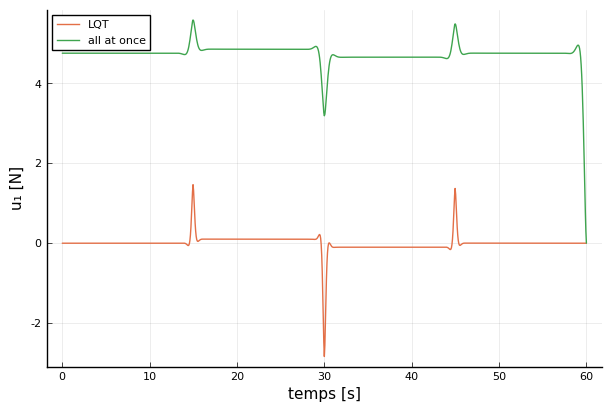

In [6]:
trajectories = Dict([("trajectoire A", traj_target), ("Ipopt", traj_opt_ipopt), ("RipQP", traj_opt_ripqp),("LQT", traj_opt_lqt)])
plt_pos = plot_trajectory(trajectories)
plt_u1 = plot_u1(Dict([ ("all at once", stats_ripqp),("LQT", stats_lqt)]))
savefig(plt_pos, string(output, "/comparaison_position"))
savefig(plt_u1, string(output,  "/comparaison_control"))

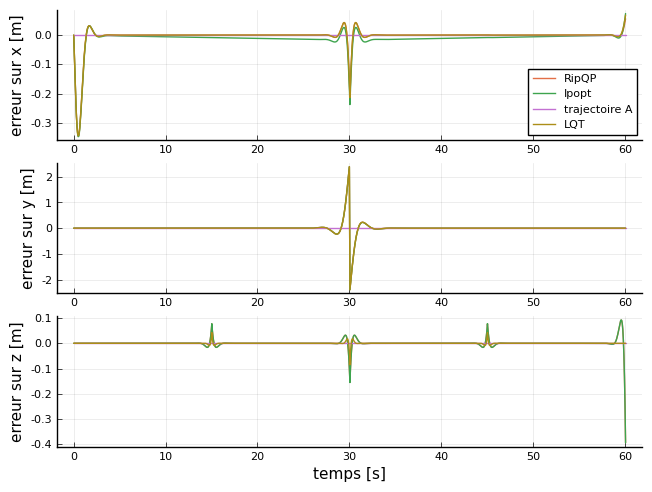

RipQP -> 7.246876066237297
Ipopt -> 7.268696697195717
trajectoire A -> 0.0
LQT -> 7.221938576528697


In [7]:
plt_error, dict_error = solve_L2_error(trajectories, traj_target)
for (name, L2) in dict_error
    println(name, " -> ", L2)
end
savefig(plt_error, string(output, "/comparaison_erreur"))

# Benchmark

In [8]:
using DataFrames
stats_dict = Dict()

solvers = [all_at_once_ipopt, all_at_once_RipQP, LQT_D]
names = [:Ipopt, :RipQP, :LQT]

traj_problems = [generate_problem("A",disturbed=false), 
                 generate_problem("A",disturbed=true),
                 generate_problem("B",disturbed=false),
                 generate_problem("B",disturbed=true)]
problem_names = ["traj. A", "traj. A, perturbée", "traj. B", "traj. B, perturbée"]

for i in 1:length(solvers)
    name = names[i]

    status::Array{Symbol,1} = []
    iter::Array{Int,1} = []
    error::Array{Float64,1} = []
    t::Array{Float64,1} = []
    dual_feas::Array{Float64,1} = []
    
    for problem in traj_problems
        stat = solvers[i](problem)
        push!(status, stat.status)
        push!(iter, stat.iter)
        push!(t,stat.elapsed_time)
        traj_opt, _ = sol_2_trajectory(stat, problem)
        _, er = solve_L2_error(Dict([("",traj_opt)]), problem)
        push!(error,er[""])
        push!(dual_feas, stat.dual_feas)
        
    end
    stats_dict[name] = DataFrame(:id => 1:length(traj_problems),
                                :name => problem_names,
                                :status => status,
                                :iter => iter,
                                :error => error,
                                :elapsed_time => t)
end

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    35944
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    10989

Total number of variables............................:    15984
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:    15984
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

┌ Info:   iter       obj      rgap      ‖rb‖      ‖rc‖      ‖Δx‖     α_pri      α_du         μ  
└ @ RipQP /home/abraham/.julia/packages/RipQP/gMieu/src/RipQP.jl:72
┌ Info:      0   1.8e+04   5.6e+00   3.7e-01   4.7e+02   0.0e+00   0.0e+00   0.0e+00       NaN
└ @ RipQP /home/abraham/.julia/packages/RipQP/gMieu/src/RipQP.jl:77
┌ Info:      1  -3.4e+07   4.1e-03   8.0e-01   7.0e-01   8.3e+03   1.0e+00   1.0e+00       NaN
└ @ RipQP /home/abraham/.julia/packages/RipQP/gMieu/src/iterations/iterations.jl:168
┌ Info:      2  -3.4e+07   1.5e-04   7.7e-02   1.3e-03   9.9e+01   1.0e+00   1.0e+00       NaN
└ @ RipQP /home/abraham/.julia/packages/RipQP/gMieu/src/iterations/iterations.jl:168
┌ Info:      3  -3.4e+07   5.3e-06   6.2e-03   5.2e-05   2.5e+01   1.0e+00   1.0e+00       NaN
└ @ RipQP /home/abraham/.julia/packages/RipQP/gMieu/src/iterations/iterations.jl:168
┌ Info:      4  -3.4e+07   6.1e-08   9.5e-05   8.1e-07   3.1e+00   1.0e+00   1.0e+00       NaN
└ @ RipQP /home/abraham/.julia/packag

In [9]:
using SolverBenchmark

header = Dict(
  :name => "trajectoire",
  :status => "statut",
  :iter => "itérations",
  :error => "L2 erreur [m]",
  :elapsed_time => "temps [s]",
)
captions = [string("\\caption{Métriques de résolution pour le solveur ", name, "}") for name in names]
open("rapport3/tables.tex", "w") do file
    for (i,(key,value)) in enumerate(stats_dict)
        println(key)
        println(value)


        cols = [:name,:status,:iter,:error,:elapsed_time,]


        pretty_stats(value[!,cols],hdr_override=header)

        println(file, captions[i])
        pretty_latex_stats(file, value[!,cols],hdr_override=header)
        println(file, "\n\n")
    end
end

Ipopt
4×6 DataFrame
│ Row │ id    │ name               │ status      │ iter  │ error   │ elapsed_time │
│     │ Int64 │ String             │ Symbol      │ Int64 │ Float64 │ Float64      │
├─────┼───────┼────────────────────┼─────────────┼───────┼─────────┼──────────────┤
│ 1   │ 1     │ traj. A            │ first_order │ 2     │ 7.2687  │ 6.839        │
│ 2   │ 2     │ traj. A, perturbée │ first_order │ 2     │ 7.29245 │ 6.842        │
│ 3   │ 3     │ traj. B            │ first_order │ 2     │ 2.80425 │ 6.92         │
│ 4   │ 4     │ traj. B, perturbée │ first_order │ 2     │ 2.85684 │ 7.036        │
┌────────────────────┬─────────────┬────────────┬───────────────┬───────────┐
│        trajectoire │      statut │ itérations │ L2 erreur [m] │ temps [s] │
├────────────────────┼─────────────┼────────────┼───────────────┼───────────┤
│            traj. A │ first_order │          2 │      7.27e+00 │  6.84e+00 │
│ traj. A, perturbée │ first_order │          2 │      7.29e+00 │  6.84e+00 │
│ 

# Convergence en n

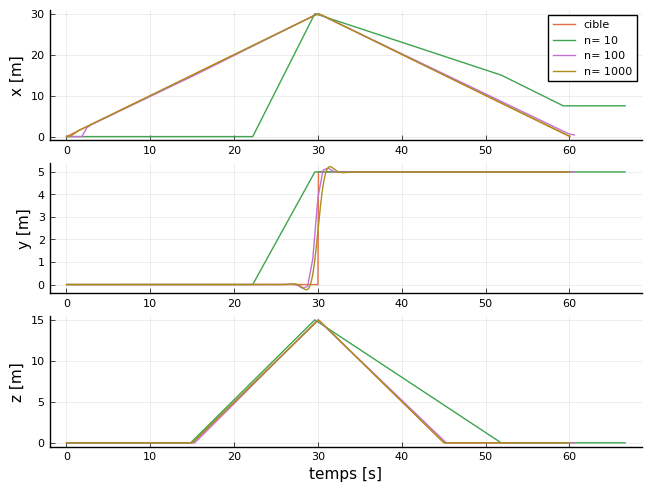

In [10]:
using Printf 

trajectories = Dict{String,trajectory}()
for n in (10,100,1000)
    traj_target = generate_problem("A",n=n)
    stats_lqt = LQT_D(traj_target)
    traj_opt, _ = sol_2_trajectory(stats_lqt, traj_target)
    trajectories[@sprintf("n= %i", n)] = traj_opt
end
trajectories["cible"] = traj_target
plt_pos = plot_trajectory(trajectories)
savefig(plt_pos, string(output,"/convergence"))

# Étude avec perturbations

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    35944
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    10989

Total number of variables............................:    15984
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:    15984
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

┌ Info:   iter       obj      rgap      ‖rb‖      ‖rc‖      ‖Δx‖     α_pri      α_du         μ  
└ @ RipQP /home/abraham/.julia/packages/RipQP/gMieu/src/RipQP.jl:72
┌ Info:      0   1.7e+04   5.7e+00   7.6e-01   8.0e+02   0.0e+00   0.0e+00   0.0e+00       NaN
└ @ RipQP /home/abraham/.julia/packages/RipQP/gMieu/src/RipQP.jl:77
┌ Info:      1  -2.1e+08   3.2e-03   2.3e-01   1.2e+00   2.1e+04   1.0e+00   1.0e+00       NaN
└ @ RipQP /home/abraham/.julia/packages/RipQP/gMieu/src/iterations/iterations.jl:168
┌ Info:      2  -2.1e+08   2.3e-05   5.2e-02   7.9e-04   9.9e+01   1.0e+00   1.0e+00       NaN
└ @ RipQP /home/abraham/.julia/packages/RipQP/gMieu/src/iterations/iterations.jl:168
┌ Info:      3  -2.1e+08   1.1e-06   1.5e-02   1.0e-04   2.4e+01   1.0e+00   1.0e+00       NaN
└ @ RipQP /home/abraham/.julia/packages/RipQP/gMieu/src/iterations/iterations.jl:168
┌ Info:      4  -2.1e+08   3.0e-08   5.2e-04   3.6e-06   5.9e+00   1.0e+00   1.0e+00       NaN
└ @ RipQP /home/abraham/.julia/packag

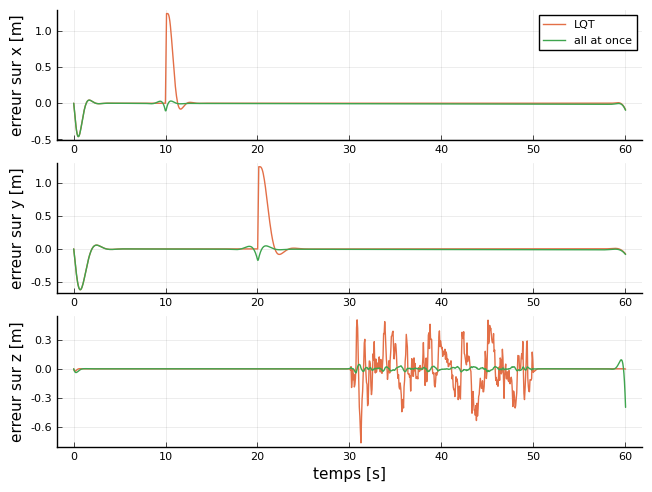

LQT -> 7.771163642690169
all at once -> 2.8562493842861696


In [11]:
traj_target = generate_problem("B", disturbed=true)
stats_ipopt = all_at_once_ipopt(traj_target)
stats_ripqp = all_at_once_RipQP(traj_target)
stats_lqt = LQT_D(traj_target)
traj_opt_ipopt, traj_sim_ipopt = sol_2_trajectory(stats_ipopt, traj_target)
traj_opt_ripqp, traj_sim_ripqp = sol_2_trajectory(stats_ripqp, traj_target)
traj_opt_lqt, traj_sim_lqt = sol_2_trajectory(stats_lqt, traj_target)
trajectories = Dict([("all at once", traj_opt_ipopt), ("LQT", traj_opt_lqt)])
plt_pos = plot_trajectory(trajectories)
plt_u1 = plot_u1(Dict([ ("all at once", stats_ripqp),("LQT", stats_lqt)]))
savefig(plt_pos, string(output, "/dist_position"))
savefig(plt_u1, string(output,  "/dist_control"))
plt_error, dict_error = solve_L2_error(trajectories, traj_target)
for (name, L2) in dict_error
    println(name, " -> ", L2)
end
savefig(plt_error, string(output, "/dist_erreur"))

# Solution non linéarisé

┌ Info:   iter       obj      rgap      ‖rb‖      ‖rc‖      ‖Δx‖     α_pri      α_du         μ  
└ @ RipQP /home/abraham/.julia/packages/RipQP/gMieu/src/RipQP.jl:72
┌ Info:      0   3.1e+01   6.6e+01   5.8e-02   4.7e+02   0.0e+00   0.0e+00   0.0e+00       NaN
└ @ RipQP /home/abraham/.julia/packages/RipQP/gMieu/src/RipQP.jl:77
┌ Info:      1  -3.4e+07   3.2e-03   9.4e-01   7.0e-01   8.3e+03   1.0e+00   1.0e+00       NaN
└ @ RipQP /home/abraham/.julia/packages/RipQP/gMieu/src/iterations/iterations.jl:168
┌ Info:      2  -3.4e+07   1.4e-03   2.3e-01   1.7e-03   8.7e+01   1.0e+00   1.0e+00       NaN
└ @ RipQP /home/abraham/.julia/packages/RipQP/gMieu/src/iterations/iterations.jl:168
┌ Info:      3  -3.4e+07   4.6e-03   5.6e-02   1.6e-04   2.9e+02   1.0e+00   1.0e+00       NaN
└ @ RipQP /home/abraham/.julia/packages/RipQP/gMieu/src/iterations/iterations.jl:168
┌ Info:      4  -3.4e+07   3.9e-03   2.2e-02   4.5e-05   4.6e+02   1.0e+00   1.0e+00       NaN
└ @ RipQP /home/abraham/.julia/packag

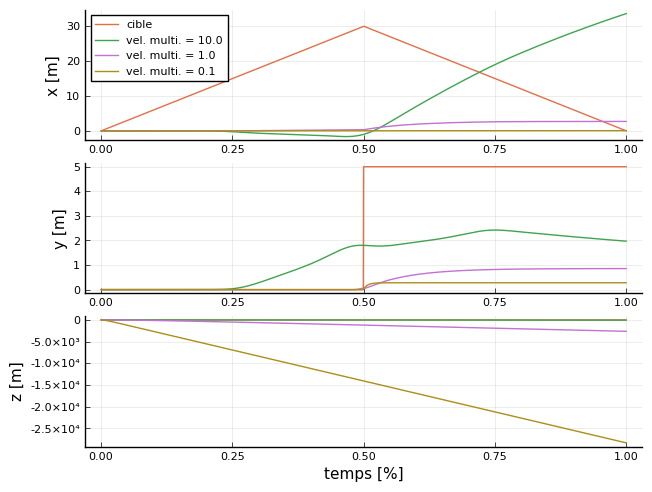

┌ Info:   iter       obj      rgap      ‖rb‖      ‖rc‖      ‖Δx‖     α_pri      α_du         μ  
└ @ RipQP /home/abraham/.julia/packages/RipQP/gMieu/src/RipQP.jl:72
┌ Info:      0   1.1e+05   1.1e+00   1.3e-01   4.7e+02   0.0e+00   0.0e+00   0.0e+00       NaN
└ @ RipQP /home/abraham/.julia/packages/RipQP/gMieu/src/RipQP.jl:77
┌ Info:      1  -3.4e+07   2.9e-03   1.2e-01   7.1e-01   8.3e+03   1.0e+00   1.0e+00       NaN
└ @ RipQP /home/abraham/.julia/packages/RipQP/gMieu/src/iterations/iterations.jl:168
┌ Info:      2  -3.4e+07   4.2e-07   2.7e-03   1.7e-04   1.3e+01   1.0e+00   1.0e+00       NaN
└ @ RipQP /home/abraham/.julia/packages/RipQP/gMieu/src/iterations/iterations.jl:168
┌ Info:      3  -3.4e+07   2.2e-10   4.3e-05   2.5e-06   1.9e-01   1.0e+00   1.0e+00       NaN
└ @ RipQP /home/abraham/.julia/packages/RipQP/gMieu/src/iterations/iterations.jl:168
┌ Info:      4  -3.4e+07   3.3e-13   6.9e-08   4.0e-09   3.1e-03   1.0e+00   1.0e+00       NaN
└ @ RipQP /home/abraham/.julia/packag

In [14]:
function nonlinearResults(solver)
    traj_target = generate_problem("A", n=2000)
    trajectories = Dict([("cible", traj_target)])
    for time_multiplier in [0.1,1,10]
        traj_target = generate_problem("A",time_multiplier = time_multiplier)
        stats_lqt = solver(traj_target)
        _, traj_sim_lqt = sol_2_trajectory(stats_lqt, traj_target)
        trajectories[@sprintf("vel. multi. = %.1f", 1/time_multiplier)] = traj_sim_lqt
    end


    px = plot([], [], ylabel="x [m]", label="")
    py = plot([], [], ylabel="y [m]", legend=false, label="")
    pz = plot([], [], ylabel="z [m]", xlabel="temps [%]", legend=false, label="")

    for (name, traj) in trajectories
        n = traj.n
        dt = traj.dt
        t = range(0, 1; length=n)

        x_sol = [traj.r[i][xi] for i in 1:n]
        y_sol = [traj.r[i][yi] for i in 1:n]
        z_sol = [traj.r[i][zi] for i in 1:n]

        plot!(px, t, x_sol, label=name)
        plot!(py, t, y_sol, label=name)
        plot!(pz, t, z_sol, label=name)
    end

    l = @layout [a ; b; c]
    plt = plot(px, py, pz, layout=l)
    plot!(plt, size=(640, 480))
    return plt
end

plt = nonlinearResults(all_at_once_RipQP)
savefig(plt, string(output, "/non_linear_position_ripqp"))

plt = nonlinearResults(LQT_D)
savefig(plt, string(output, "/non_linear_position_lqt"))

# Trajectoires utilisées

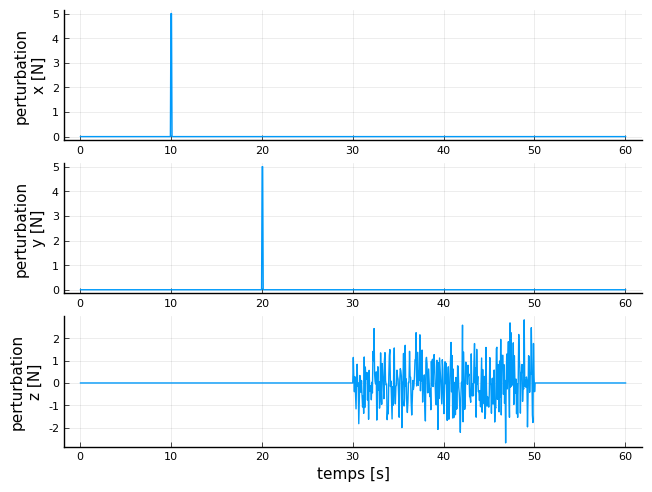

In [13]:
trajectories = Dict([("trajectoire A", generate_problem("A"))])
plt_pos = plot_trajectory(trajectories)
savefig(plt_pos,string(output, "/trajectoireA"))

trajectories = Dict([("trajectoire B", generate_problem("B"))])
plt_pos = plot_trajectory(trajectories)
savefig(plt_pos,string(output, "/trajectoireB"))

traj_target = generate_problem("B",disturbed=true)
plt = plot_disturbance(traj_target.disturbance, traj_target.dt)
savefig(plt, string(output,"/perturb"))